In [189]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [269]:
import celloracle as co
co.__version__

'0.14.0'

In [270]:
# Define run arguments
h5ad_in = "/cellar/users/aklie/data/igvf/topic_grn_links/subsets/for_regulon_inference/Bridge_Satpathy/29Aug23/3744376661_20230829-175127/balanced_genotype_microglia/0.05/log1p_cp10k/balanced_genotype_microglia-both.0.05.log1p_cp10k.h5ad"
out_dir = "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/celloracle/results/Bridge_Satpathy/scratch"
layer = "normalized_counts"

In [271]:
# Function for checking if data is counts
def is_counts(data, percent=1.0):
    greater_than_0 = (np.sum(data >= 0) / data.size)*100
    int_equals = (np.sum(data.astype(int) == data) / data.size)*100
    if np.all(data >= 0) and np.all(data.astype(int) == data):
        print("The matrix contains all count data.")
    elif np.sum(data >= 0) / data.size >= percent and np.sum(data.astype(int) == data) / data.size >= percent:
        print(f"The matrix contains more than {percent}% count data. Greater than 0: {greater_than_0}%, Int equals: {int_equals}%")
    else:
        print(f"The matrix contains less than {percent}% count data. Greater than 0: {greater_than_0}%, Int equals: {int_equals}%")

# Load AnnData object

In [282]:
# Read in the h5ad and make sure the correct counts are used
adata = sc.read_h5ad(h5ad_in)
adata

AnnData object with n_obs × n_vars = 2996 × 6277
    obs: 'sample', 'Tissue', 'Sex', 'Genotype', 'doublet_scores', 'percent.mt', 'percent.ribo', 'subtypes', 'celltypes', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_id', 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'normalized_counts'

In [283]:
# Create a new column in the adata.obs dataframe that contains the log of the total counts for each cell, for plotting
adata.obs['log_counts'] = np.log(adata.obs['total_counts'])

In [284]:
# Keep raw cont data before log transformation
adata.raw = adata
adata.layers["raw_count"] = adata.raw.X.copy()

In [285]:
# 
adata.obs["sample"] = adata.obs["sample"].astype("category")

In [286]:
adata.to_df()

gene,Xkr4,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,4732440D04Rik,Rb1cc1,St18,Pcmtd1,...,mt-Rnr1,mt-Rnr2,mt-Nd1,mt-Nd2,mt-Co1,mt-Co2,mt-Atp6,mt-Co3,mt-Nd4,mt-Cytb
AAACGGATCGGTTACG_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0
AAAGGACGTGTGTCCC_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0
AAATGGCCACAAACTT_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
AACAAGCCACTTACAG_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.0,1.0,0.0
AACCGGCTCGCTAAAC_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTTGCAAACTGTT_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.5,0.0,0.0
TTTGAGTCAGGCAAGC_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
TTTGGCTGTCATTGAG_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
TTTGGCTGTGAGAAAC_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0


In [288]:
# Read in the h5ad and make sure the correct counts are used
if layer is not None:
    adata.X = adata.layers[layer]

In [289]:
adata.to_df()

gene,Xkr4,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,4732440D04Rik,Rb1cc1,St18,Pcmtd1,...,mt-Rnr1,mt-Rnr2,mt-Nd1,mt-Nd2,mt-Co1,mt-Co2,mt-Atp6,mt-Co3,mt-Nd4,mt-Cytb
AAACGGATCGGTTACG_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.800870,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.166706,0.000000,0.000000
AAAGGACGTGTGTCCC_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,2.925023,0.000000,0.000000,0.0,0.000000,0.000000,2.284149,0.000000,0.000000
AAATGGCCACAAACTT_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,2.542789,0.0,0.0,0.000000,...,2.542789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AACAAGCCACTTACAG_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.579065,...,3.233552,0.000000,2.579065,0.000000,0.0,0.000000,1.959024,0.000000,2.579065,0.000000
AACCGGCTCGCTAAAC_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,3.718093,0.000000,0.000000,1.795622,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTTGCAAACTGTT_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,2.529061,2.529061,0.0,0.0,0.000000,...,2.529061,0.000000,0.000000,0.000000,0.0,1.912629,0.000000,1.912629,0.000000,0.000000
TTTGAGTCAGGCAAGC_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.711368,...,4.108652,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
TTTGGCTGTCATTGAG_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,3.061570,2.414174,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
TTTGGCTGTGAGAAAC_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.748508,0.000000


In [290]:
is_counts(adata.raw.X.A, percent=0.95)
is_counts(adata.layers["raw_count"].A, percent=0.95)
is_counts(adata.layers["normalized_counts"].A, percent=0.95)
is_counts(adata.X.A, percent=0.95)

The matrix contains more than 0.95% count data. Greater than 0: 100.0%, Int equals: 98.48124194268478%
The matrix contains more than 0.95% count data. Greater than 0: 100.0%, Int equals: 98.48124194268478%
The matrix contains less than 0.95% count data. Greater than 0: 100.0%, Int equals: 86.3862612844953%
The matrix contains less than 0.95% count data. Greater than 0: 100.0%, Int equals: 86.3862612844953%


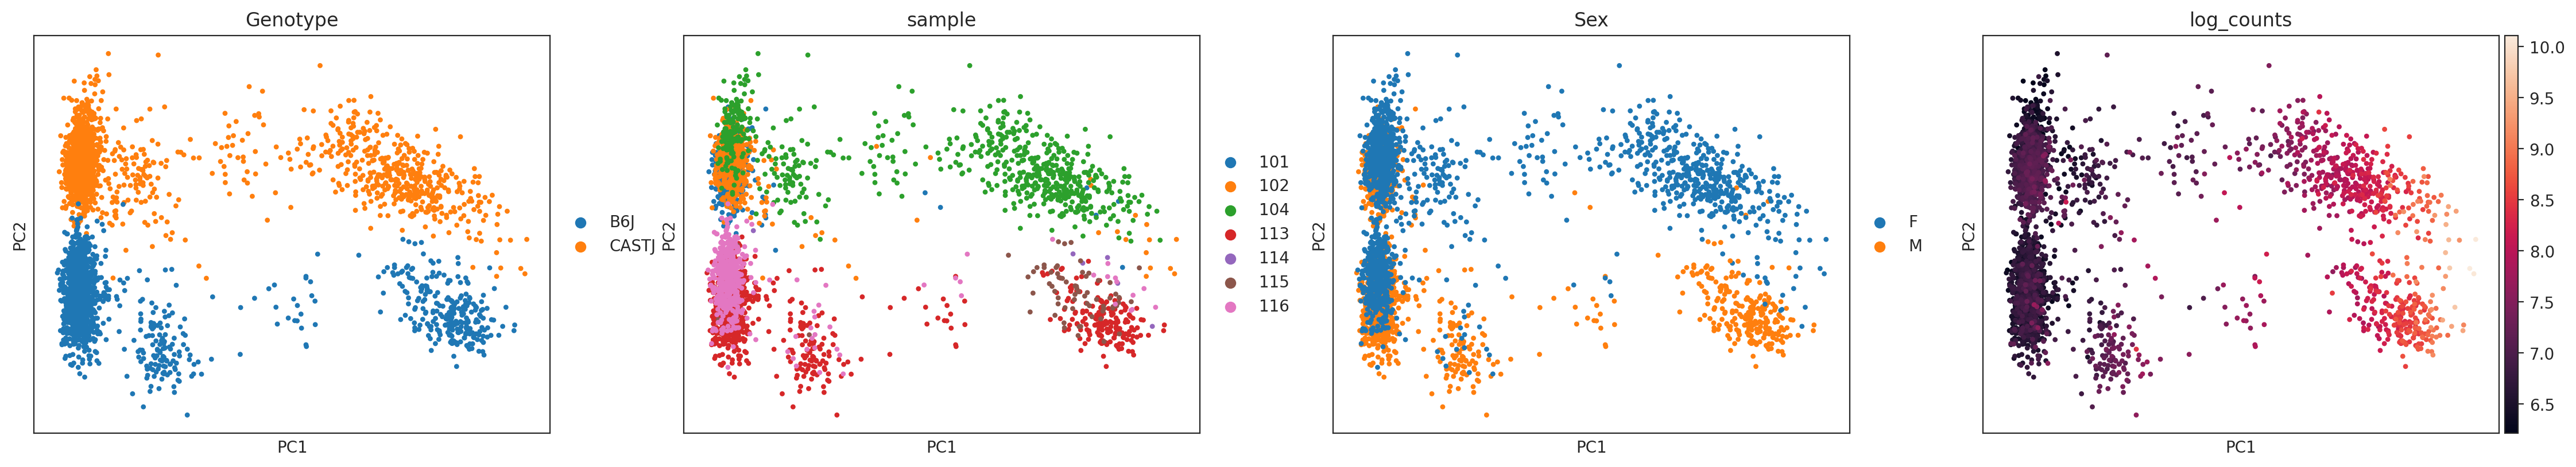

In [255]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color=["Genotype", "sample", "Sex", "log_counts"])

In [256]:
# Random downsampling into 30K cells if the anndata object include more than 30 K cells.
n_cells_downsample = 30000
if adata.shape[0] > n_cells_downsample:
    
    # Let's dowmsample into 30K cells
    sc.pp.subsample(adata, n_obs=n_cells_downsample, random_state=123)
else:
    print("The number of cells is less than 30K. No downsampling is performed.")

The number of cells is less than 30K. No downsampling is performed.


In [257]:
print(f"Cell number is :{adata.shape[0]}")
print(f"Gene number is :{adata.shape[1]}")

Cell number is :2996
Gene number is :6277


In [260]:
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()

gene,Xkr4,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,4732440D04Rik,Rb1cc1,St18,Pcmtd1,...,mt-Rnr1,mt-Rnr2,mt-Nd1,mt-Nd2,mt-Co1,mt-Co2,mt-Atp6,mt-Co3,mt-Nd4,mt-Cytb
AAACGGATCGGTTACG_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.800870,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.166706,0.000000,0.000000
AAAGGACGTGTGTCCC_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,2.925023,0.000000,0.000000,0.0,0.000000,0.000000,2.284149,0.000000,0.000000
AAATGGCCACAAACTT_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,2.542789,0.0,0.0,0.000000,...,2.542789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AACAAGCCACTTACAG_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.579065,...,3.233552,0.000000,2.579065,0.000000,0.0,0.000000,1.959024,0.000000,2.579065,0.000000
AACCGGCTCGCTAAAC_igvf_b01_LeftCortex_101,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,3.718093,0.000000,0.000000,1.795622,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTTGCAAACTGTT_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,2.529061,2.529061,0.0,0.0,0.000000,...,2.529061,0.000000,0.000000,0.000000,0.0,1.912629,0.000000,1.912629,0.000000,0.000000
TTTGAGTCAGGCAAGC_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.711368,...,4.108652,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
TTTGGCTGTCATTGAG_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,3.061570,2.414174,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
TTTGGCTGTGAGAAAC_igvf_b01_LeftCortex_116,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.748508,0.000000


In [261]:
# Create Net class object. This is the core engine in the Oracle object
net = co.Net(
    gene_expression_matrix=adata.to_df(), # Input gene expression matrix as data frame
    TFinfo_matrix=base_GRN, # Input base GRN
    verbose=True
)

initiating Net object ...
gem_shape: (2996, 6277)
TF info shape: (91976, 1095)
initiation completed.


In [262]:
# Do GRN calculation
net.fit_All_genes(
    bagging_number=20,
    alpha=10, 
    verbose=True
)

  0%|          | 0/5015 [00:00<?, ?it/s]

In [263]:
# Get result
net.updateLinkList(verbose=True)
inference_result = net.linkList.copy()
inference_result

  0%|          | 0/5013 [00:00<?, ?it/s]

,source,target,coef_mean,coef_abs,p,-logp
0,Yy1,0610012G03Rik,0.013085,0.013085,1.316994e-04,3.880416
1,Maf,0610012G03Rik,0.012976,0.012976,1.864948e-04,3.729333
2,Setdb1,0610012G03Rik,0.007264,0.007264,4.564168e-03,2.340638
3,Zbtb1,0610012G03Rik,0.025195,0.025195,2.293057e-07,6.639585
4,Bclaf1,0610012G03Rik,-0.005513,0.005513,1.414788e-01,0.849309
...,...,...,...,...,...,...
526842,Sp3,a,0.007550,0.007550,4.429968e-02,1.353599
526843,Zbtb7a,a,0.001166,0.001166,7.494157e-01,0.125277
526844,Arnt,a,-0.014705,0.014705,5.224726e-04,3.281937
526845,Pou2f2,a,0.033940,0.033940,2.129062e-08,7.671812


In [266]:
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [267]:
inference_result.to_csv(os.path.join(out_dir, "inference_result.csv"))

In [225]:
# Instantiate Oracle objezct
oracle = co.Oracle()

In [226]:
# Check data in anndata
print("Metadata columns :", list(adata.obs.columns))
print("Dimensional reduction: ", list(adata.obsm.keys()))

Metadata columns : ['sample', 'Tissue', 'Sex', 'Genotype', 'doublet_scores', 'percent.mt', 'percent.ribo', 'subtypes', 'celltypes', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log_counts']
Dimensional reduction:  ['X_pca']


In [227]:
oracle.import_anndata_as_normalized_count(adata=adata, cluster_column_name="Genotype", embedding_name="X_pca")

6277 genes were found in the adata. Note that Celloracle is intended to use around 1000-3000 genes, so the behavior with this number of genes may differ from what is expected.


In [234]:
oracle.adata.layers["normalized_count"].A

array([[0.        , 0.        , 0.        , ..., 2.16670585, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.28414893, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.74850845,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.46256828]])

In [235]:
oracle.adata.layers["normalized_counts"].A

array([[0.        , 0.        , 0.        , ..., 2.16670585, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.28414893, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.74850845,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.46256828]])

In [237]:
oracle.import_TF_data(TF_info_matrix=base_GRN)

In [ ]:
oracle.adata.layers["imputed_count"] = oracle.adata.layers["normalized_count"].copy()

In [246]:
genotype_links = oracle.get_links(cluster_name_for_GRN_unit="Genotype", alpha=10, verbose_level=10)

  0%|          | 0/2 [00:00<?, ?it/s]

Inferring GRN for B6J...


  0%|          | 0/5015 [00:00<?, ?it/s]

KeyboardInterrupt: 

# DONE!


---

# Scratch